### Complejidad - Práctico 3/6 - Atractor de Lorenz 
#### Lautaro Giordano

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [2]:
def lorenz_eqs(vars, t, r):
    sigma = 10
    b = 8 / 3

    x, y, z = vars
    
    dx = sigma * (y - x)
    dy = x * (r - z) - y
    dz = x * y - b * z

    return [dx, dy, dz]


def lorenz_solver(r, x0, t):
    # x0 = [x0, y0, z0]
    # t es una secuencia de tiempos
    # odeint resuelve en python un sistema de ecuaciones diferenciales ordinarias
    # dadas por la función lorenz_eqs, con condiciones iniciales x0 y en los tiempos t
    return odeint(lorenz_eqs, x0, t, args=(r,))


def generate_plots(x, t, drop):
    # Plots
    plt.figure(figsize=(12, 5))
    plt.plot(t[drop:], x[drop:, 0], label="x(t)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.plot(t[drop:], x[drop:, 1], label="y(t)")
    plt.legend()
    plt.show()


    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d", elev=10, azim=100)
    ax.plot(x[drop:, 0], x[drop:, 1], x[drop:, 2], label="Lorenz", linewidth=0.4)
    plt.show()

### Ej 1

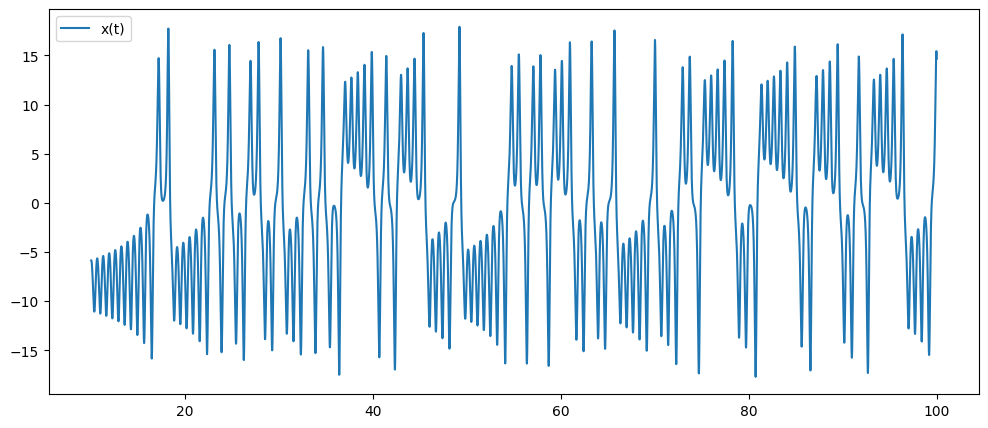

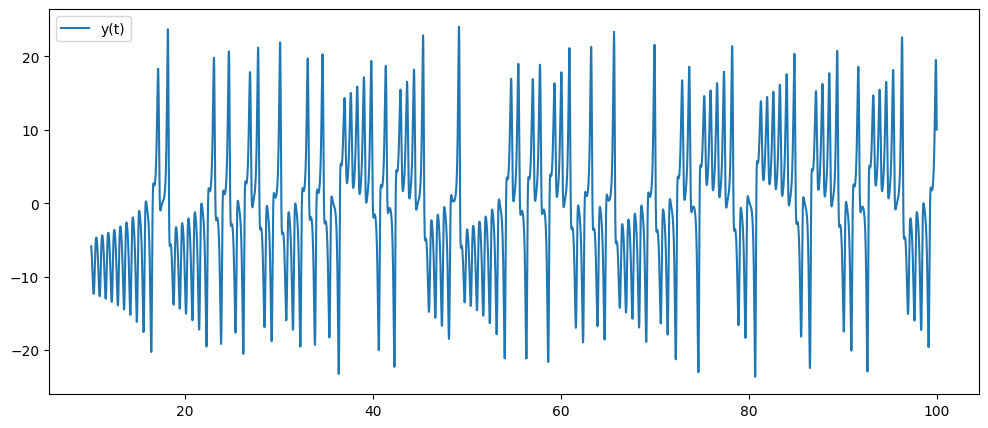

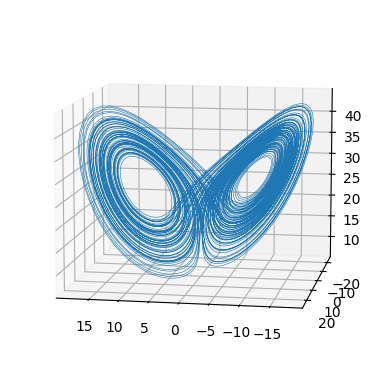

In [164]:
# Solve for r = 10, t = 100
r = 28
x0 = [1, 0, 0]
# t va de 0 a 100 en 10000 pasos
t = np.linspace(0, 100, 10000)
x = lorenz_solver(r, x0, t)
# Para sacarme el estacionario ploteo la solucion a partir de drop en adelante
drop = 1000

generate_plots(x, t, drop)

Aparece el atractor de Lorenz

Voy a ver que el mismo atractor aparece corriendo varias condiciones iniciales y sacando una foto de sus posiciones a t=30

In [266]:
t = np.linspace(0, 30, 1000)

num_soluciones = 10000
posiciones_finales = np.zeros((num_soluciones, 3))

for i in range(num_soluciones):
    x0 = np.random.uniform(-1, 1, 3)
    x = lorenz_solver(r, x0, t)
    posiciones_finales[i] = x[-1]

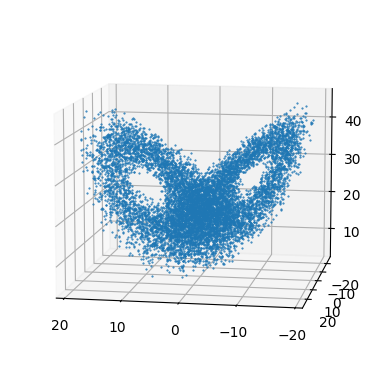

<function matplotlib.pyplot.show(close=None, block=None)>

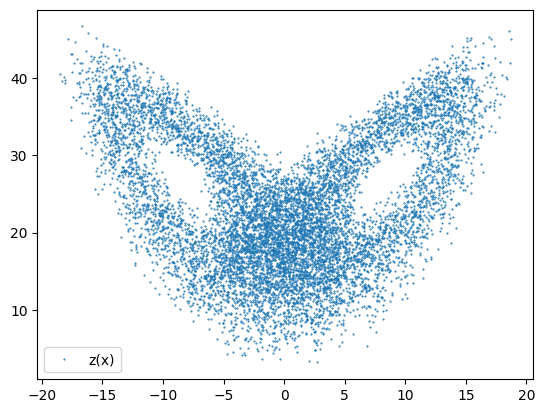

In [267]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=10, azim=100)
ax.plot(posiciones_finales[:, 0], posiciones_finales[:, 1], posiciones_finales[:, 2], "o", label="Lorenz", markersize=.5)
plt.show()

plt.plot(posiciones_finales[:, 0], posiciones_finales[:, 2], "o", markersize=.5, label="z(x)")
plt.legend()
plt.show

Pintamos el mismo atractor con muchas condiciones iniciales!

Distancia entre 2 condiciones iniciales muy cercanas:

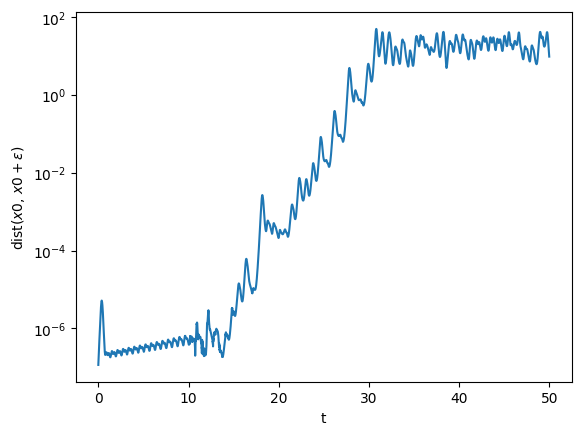

In [268]:
r = 28
x0 = [1, 0, 0]
t = np.linspace(0, 50, 10000)
drop = 000

# Condicion inicial levemente perturbada
epsilon = np.random.normal(0, .0000001, 3)
x0delta = x0 + epsilon

x1 = lorenz_solver(r, x0, t)
x2 = lorenz_solver(r, x0delta, t)

dist = np.linalg.norm(x1 - x2, axis=1)

plt.plot(t[drop:], dist)
plt.yscale('log')
plt.xlabel('t')
plt.ylabel(r'dist($x0$, $x0 + \epsilon$)')

plt.show()


La distancia entre 2 condiciones iniciales cercanas crece exponencialmente durante un rango

### Ej 2

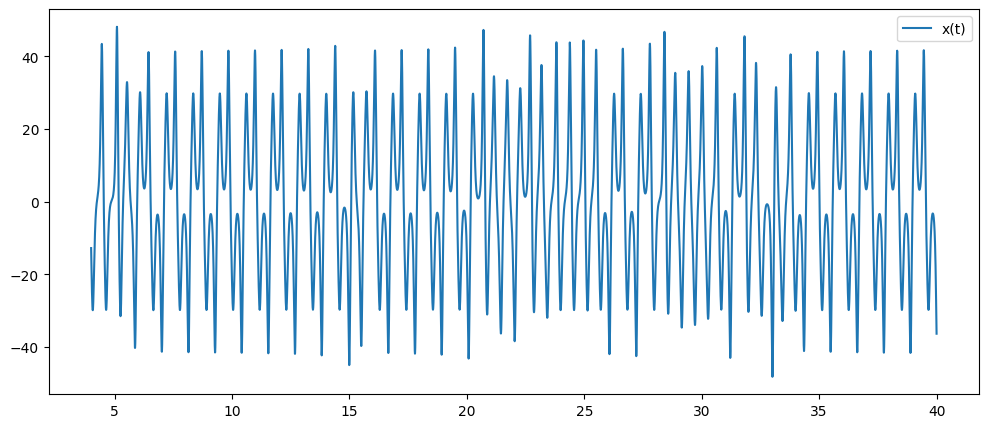

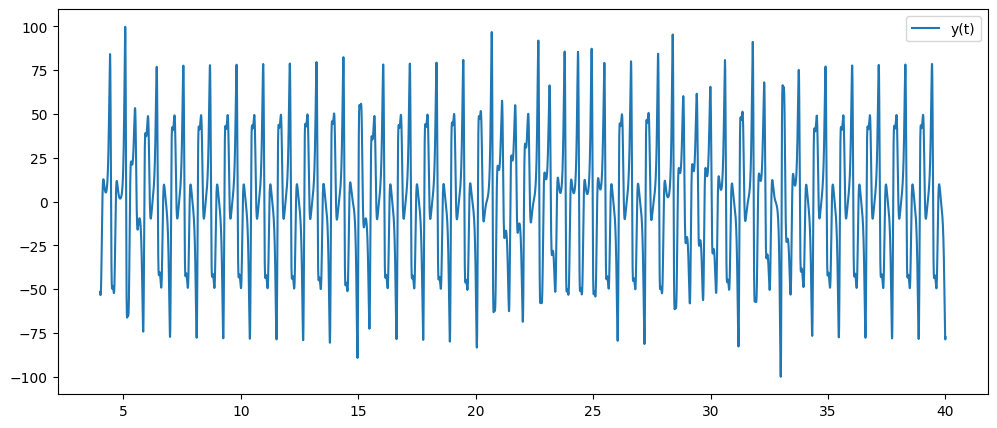

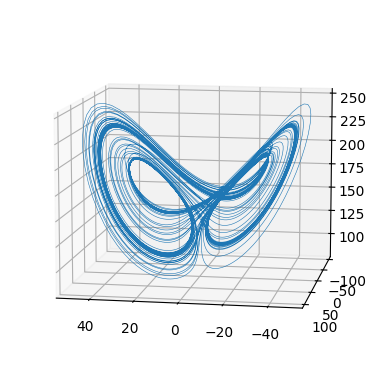

In [39]:
r = 166.3
x0 = [0, -1, 0]
t = np.linspace(0, 40, 10000)
x = lorenz_solver(r, x0, t)
drop = 1000

generate_plots(x, t, drop)

La solución parece dar un par de vueltas alrededor de C1 y C2 al principio pero en t entre 20 y 25 el período es la mitad, y luego vuelve al comportamiento inicial

### Ej 3

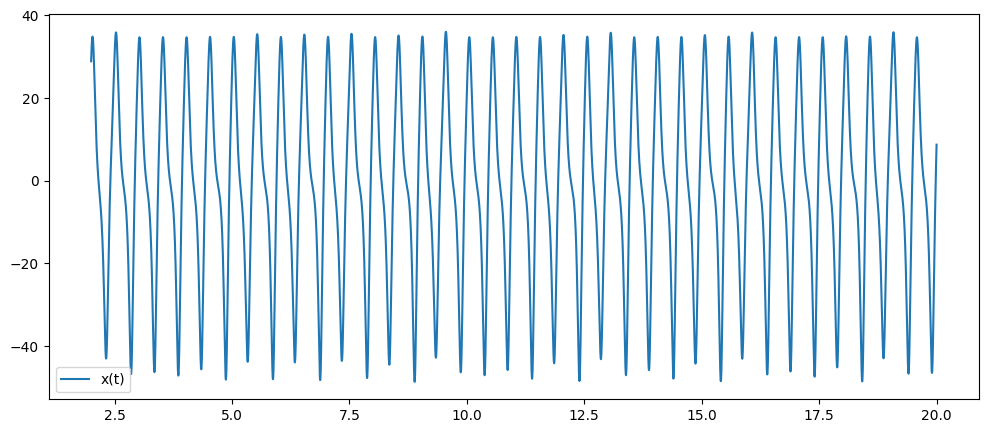

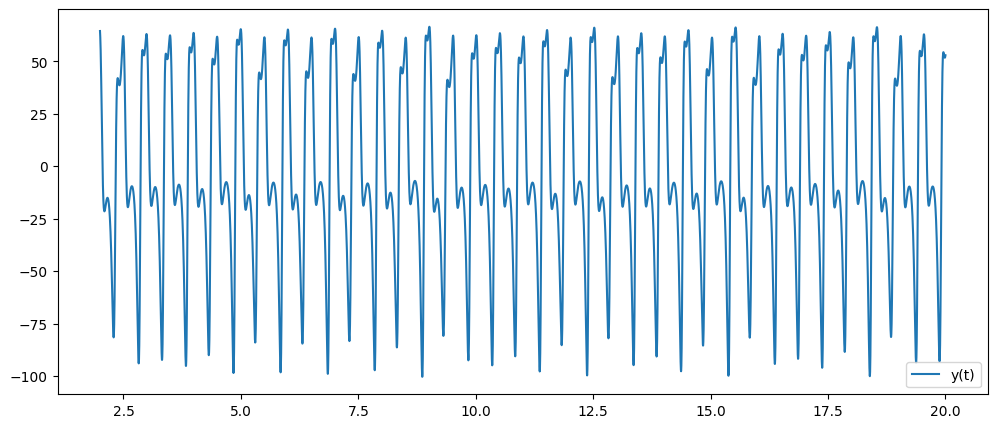

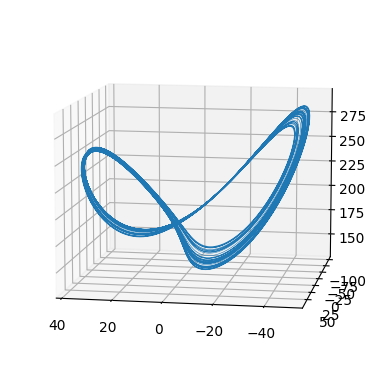

In [174]:
r = 212
x0 = [0, 1, 0]
t = np.linspace(0, 20, 10000)
x = lorenz_solver(r, x0, t)
drop = 1000

generate_plots(x, t, drop)


Parece una solución de período 4 aunque no llega siempre exactamente a la misma posición inicial. Es una órbita cuasi periódica

### Ej 5

Ahora con r = r(t) entrando y saliendo del caos

In [77]:
def lorenz_eqs_modified(vars, t):
    sigma = 10
    b = 8 / 3
    w = 0.5
    r = 24.4 + 2*np.sin(w*t)

    x, y, z = vars
    
    dx = sigma * (y - x)
    dy = x * (r - z) - y
    dz = x * y - b * z

    return [dx, dy, dz]

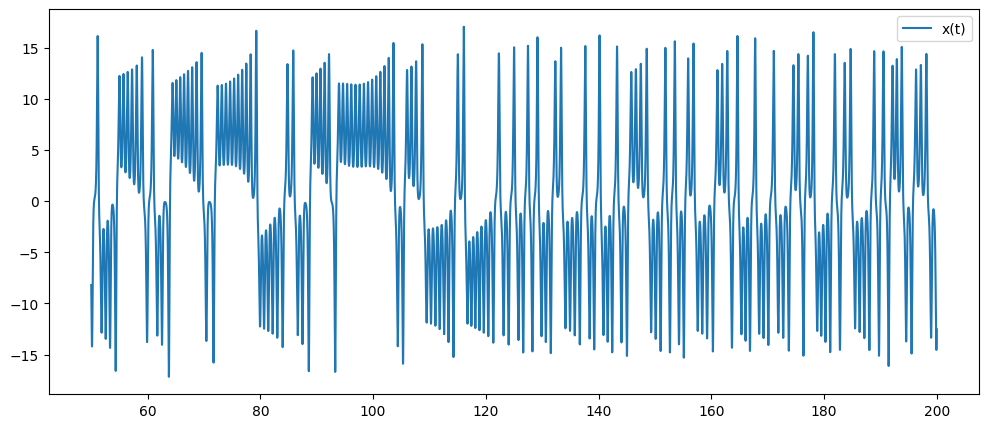

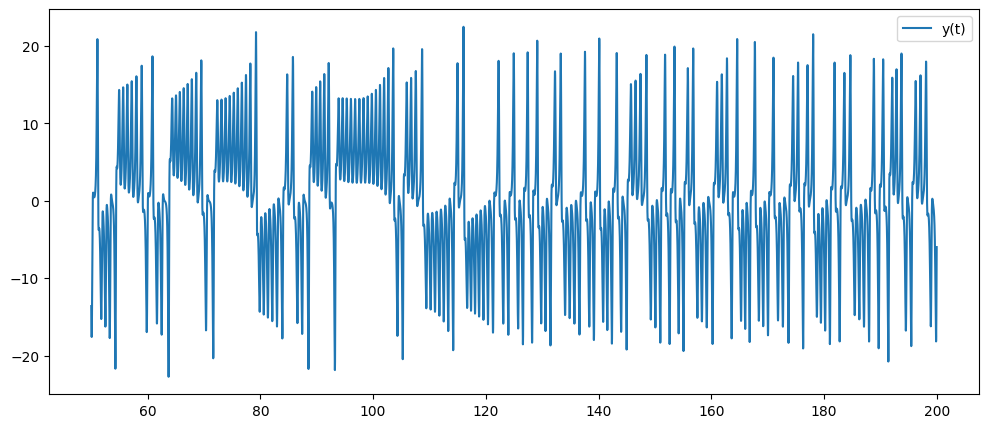

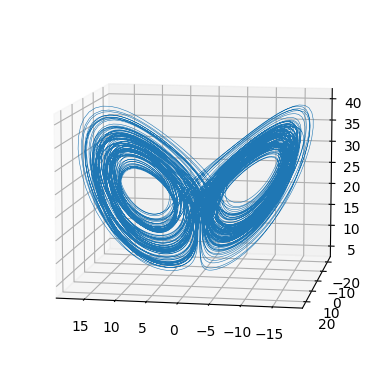

In [78]:
x0 = [0, 1, 0]
t = np.linspace(0, 200, 20000)
x = odeint(lorenz_eqs_modified, x0, t)
drop = 5000

generate_plots(x, t, drop)

La solución se ve bastante parecida a la de caos normal, pero puede ser que cuando el seno es negativo la solución se queda dando vueltas alrededor de C1 o C2.

### Ejercicios 6 y 7: mirar el archivo "ej6y7.pdf"

### Yapa: Atractor de Rossler:
https://es.wikipedia.org/wiki/Atractor_de_R%C3%B6ssler

In [219]:
def rossler_eqs(vars, t):
    A, B, C = .1, .1, 14

    x, y, z = vars

    dx = -y - z
    dy = x + A * y
    dz = B + z * (x - C)

    return [dx, dy, dz]
    
def rossler_solver(x0, t):
    return odeint(rossler_eqs, x0, t)

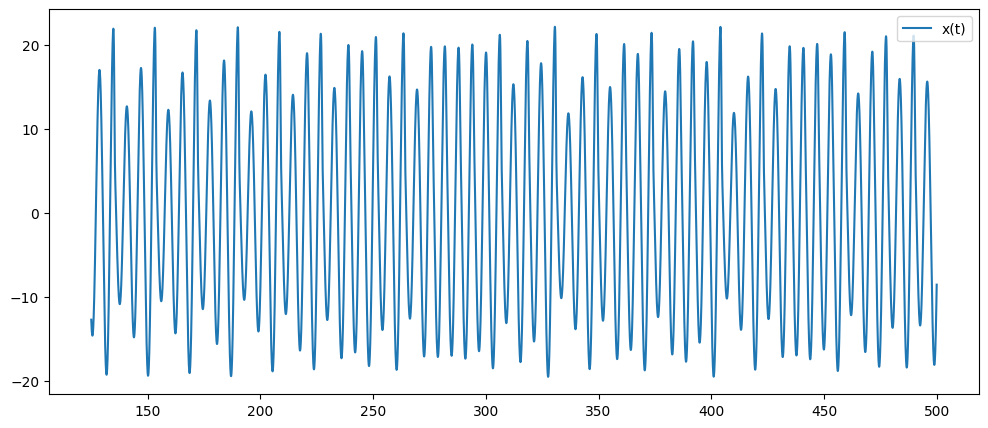

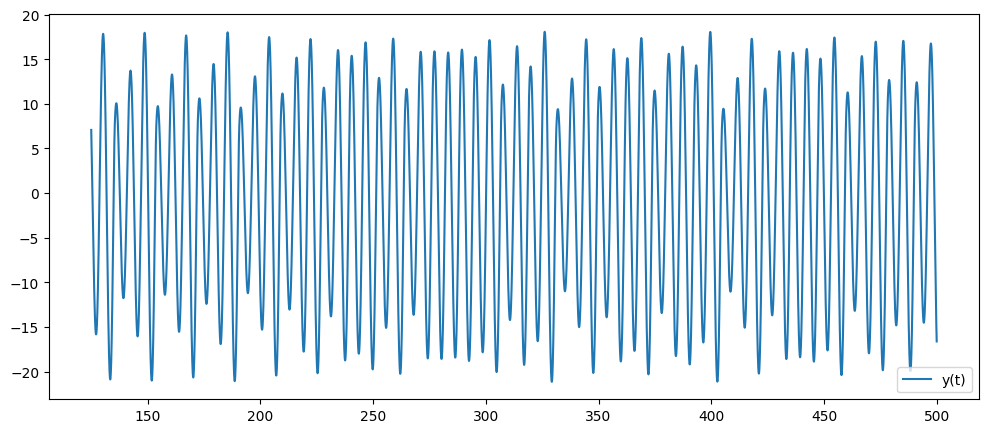

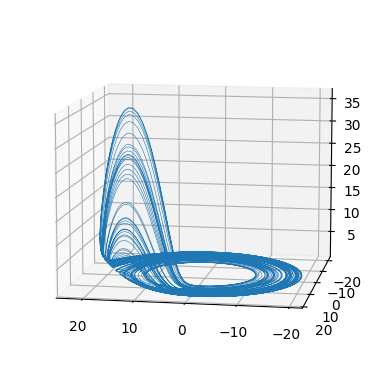

In [229]:
x0 = [0, 0, 1]
t = np.linspace(0, 500, 20000)
x = rossler_solver(x0, t)
drop = 5000

generate_plots(x, t, drop)

### Yapa 2: Atractor de Sprott: 

https://sprott.physics.wisc.edu/pubs/paper423.pdf

In [20]:
def sprott_eqs(vars, t):
    x, y, z = vars

    dx = y + 2 * x * y + x * z
    dy = 1 - 2 * x**2 + y *z
    dz = x - x**2 - y**2

    return [dx, dy, dz]

def sprott_solver(x0, t):
    return odeint(sprott_eqs, x0, t)

Según el paper, para una condición inicial cerca del origen las órbitas son cuasi-periódicas, siguiendo una especie de toro

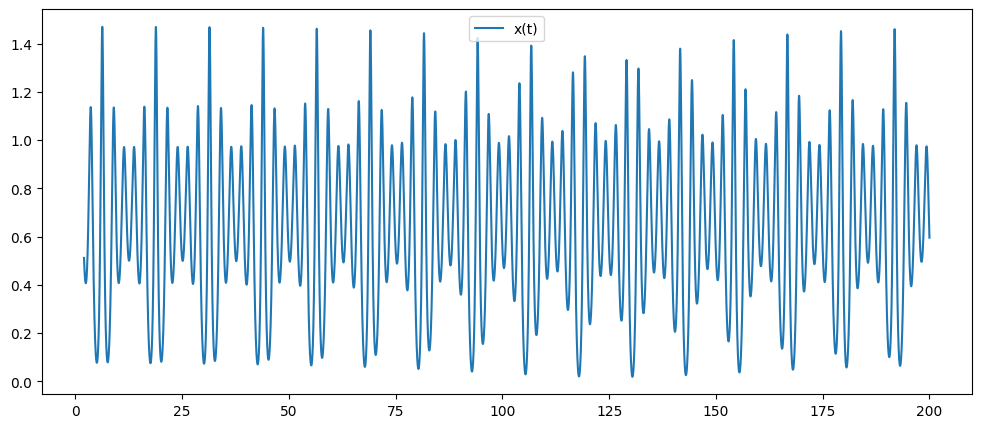

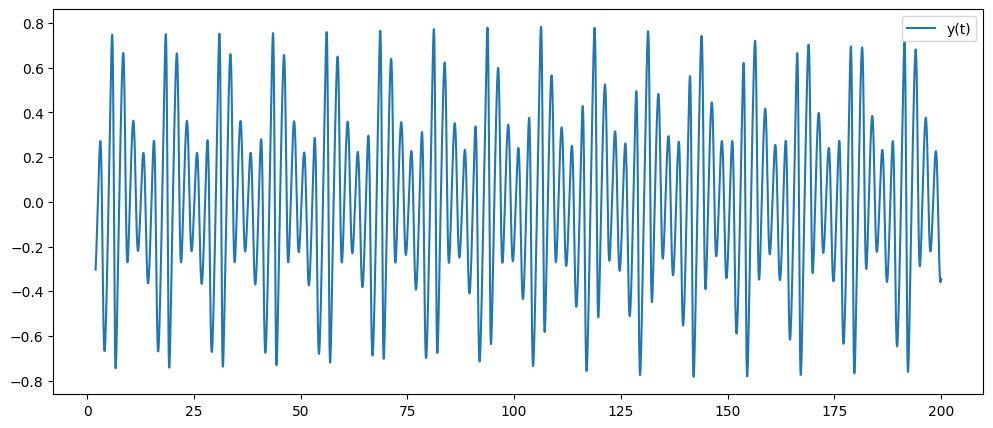

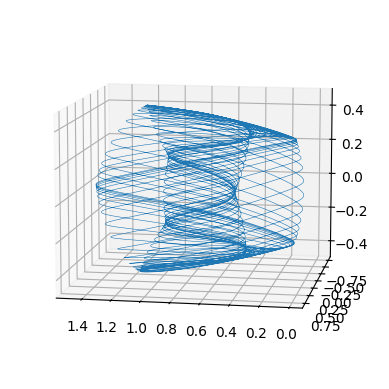

In [34]:
x0 = [.5, 0, 0]
t = np.linspace(0, 200, 100000)
x = sprott_solver(x0, t)
drop = 1000

generate_plots(x, t, drop)

Pero si nos alejamos del origen, desaparece el toro y aparece un atractor extraño

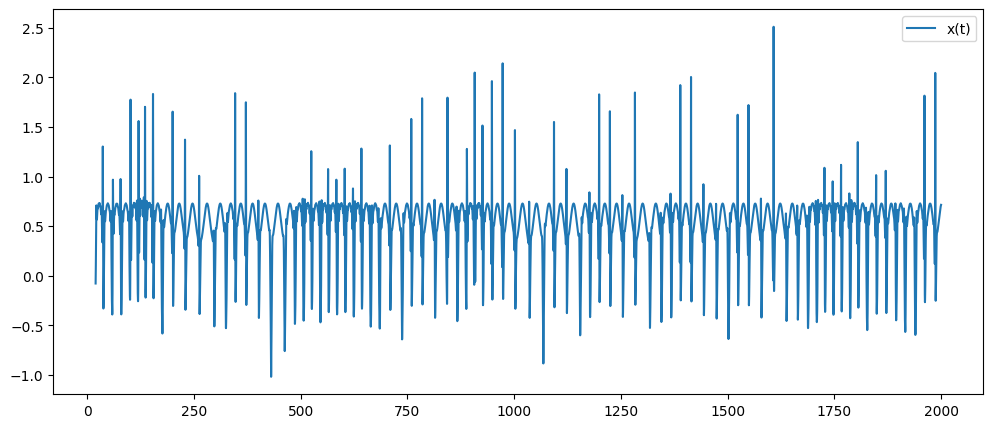

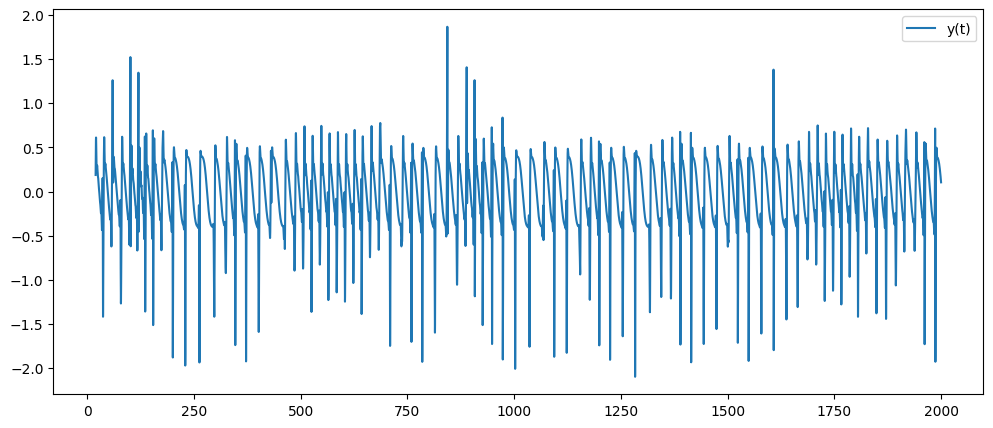

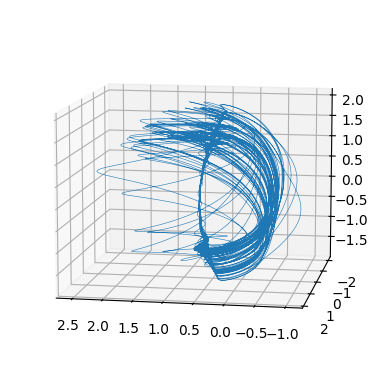

In [38]:
x0 = [2, 0, 0]
t = np.linspace(0, 2000, 100000)
x = sprott_solver(x0, t)
drop = 1000

generate_plots(x, t, drop)

Es un sistema caótico? Veamos que pasa poniendo varias condiciones iniciales lejos del origen y graficamos las distintas posiciones a tiempo t=100, como hicimos con el atractor de Lorenz

In [67]:
t = np.linspace(0, 200, 2000)

num_soluciones = 25000
posiciones_finales = np.zeros((num_soluciones, 3))

for i in range(num_soluciones):
    x0 = [3, 0, 0]
    epsilon = np.random.uniform(-.2, .2, 3)
    x0 += epsilon
    x = sprott_solver(x0, t)
    posiciones_finales[i] = x[-1]

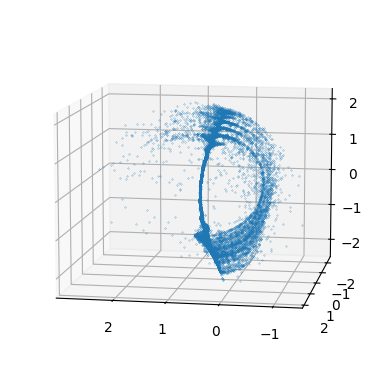

<function matplotlib.pyplot.show(close=None, block=None)>

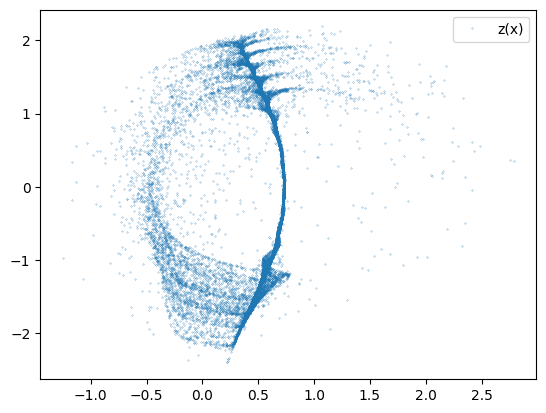

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=10, azim=100)
ax.plot(posiciones_finales[:, 0], posiciones_finales[:, 1], posiciones_finales[:, 2], "o", label="Sprott", markersize=.2)
plt.show()

plt.plot(posiciones_finales[:, 0], posiciones_finales[:, 2], "o", markersize=.2, label="z(x)")
plt.legend()
plt.show

Si! Este gráfico nos da lo mismo que la trayectoria de una sola partícula de más arriba